In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('smart_irrigation_data/train_data.csv')
df_test = pd.read_csv('smart_irrigation_data/test_data.csv')

# Dropping the 'date' feature if it's not relevant for training
df = df.drop(columns=['date'])
df_test = df_test.drop(columns=['date'])

# Separate features (X) and labels (y)
X_train = df.drop('pump', axis=1)
y_train = df['pump']

X_test = df_test.drop('pump', axis=1)
y_test = df_test['pump']



In [ ]:
# Standardize the data (fit on training, transform on both training and test sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use transform, not fit_transform, for test data

# Define a range of hyperparameters for tuning
param_grid = {
    'hidden_layer_sizes': [(10, 10), (15, 15), (20, 10), (50, 50), (100,)],  # Different combinations of layers and neurons
    'activation': ['relu', 'tanh'],  # Different activation functions
    'solver': ['adam', 'sgd'],  # Optimizers
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization (higher = stronger regularization)
    'learning_rate': ['constant', 'adaptive'],  # Learning rate schedule
    'max_iter': [1000, 2000, 3000],  # Number of iterations
    'early_stopping': [True, False]  # Stop early if validation score stops improving
}

# Create an MLPClassifier instance
mlp = MLPClassifier()

# Use GridSearchCV to find the best combination of hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=3)

# Fit the model with training data
grid_search.fit(X_train_scaled, y_train)


In [3]:
# Get the best parameters from grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 2000, 'solver': 'adam'}


Test accuracy of the best neural network model: 0.9877
Accuracy on test set: 0.9877
Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       328
           1       0.99      0.99      0.99       403

    accuracy                           0.99       731
   macro avg       0.99      0.99      0.99       731
weighted avg       0.99      0.99      0.99       731



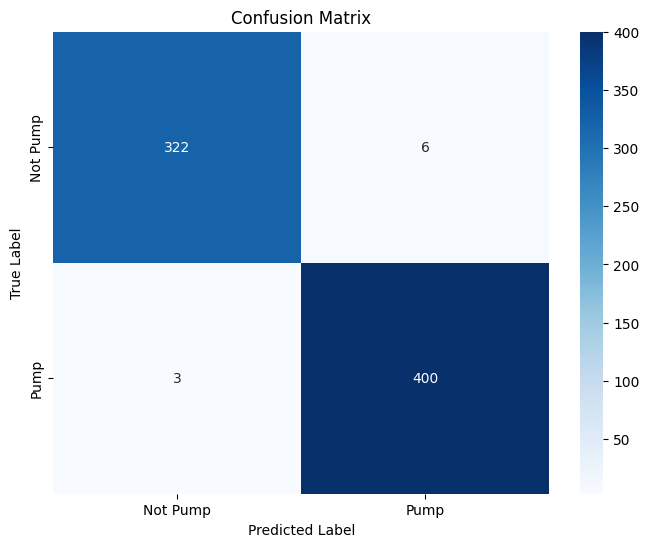

In [4]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Test accuracy of the best neural network model: {test_accuracy:.4f}")

# Optionally, evaluate the model further on the test set
y_test_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# Print classification report
print("Classification report:")
print(classification_report(y_test, y_test_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Pump', 'Pump'], yticklabels=['Not Pump', 'Pump'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()